# 第6章: 単語ベクトル

## 50. 単語ベクトルの読み込みと表示

In [4]:
# 学習済み単語ベクトルのダウンロード
!pip install gdown
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM -O data/GoogleNews-vectors-negative300.bin.gz

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=1dfcd264-1b90-4047-9050-f82ad701a07c
To: /content/data/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:17<00:00, 94.8MB/s]


In [1]:
!pip install numpy==1.24.3 gensim

In [2]:
from gensim.models import KeyedVectors
model_path = "./data/GoogleNews-vectors-negative300.bin.gz"
model = KeyedVectors.load_word2vec_format(model_path, binary=True)
model["United_States"]

# 単語ベクトルの表示方法  https://qiita.com/nymwa/items/9963968568b9dbfc2e78

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 51. 単語の類似度

In [3]:
print(model.similarity("United_States", "U.S."))

# コサイン類似度の計算 https://qiita.com/DancingEnginee1/items/b10c8ef7893d99aa53be

0.73107743


## 52. 類似度の高い単語10件

In [4]:
import numpy as np
import pandas as pd

pd.DataFrame(
  model.most_similar("United_States"),
  columns=["単語", "類似度"],
  index=np.arange(10) + 1
)

# pandasの使い方        https://qiita.com/shimotaroo/items/d3fd17b4d5f470cae957
# 連番の生成            https://deepage.net/features/numpy-arange.html#%E3%81%82%E3%82%8B%E7%B5%82%E7%82%B9%E3%81%A0%E3%81%91%E3%82%92%E6%8C%87%E5%AE%9A%E3%81%97%E3%81%9F%E5%A0%B4%E5%90%88

,単語,類似度
1,Unites_States,0.787725
2,Untied_States,0.754137
3,United_Sates,0.740072
4,U.S.,0.731077
5,theUnited_States,0.640439
6,America,0.617841
7,UnitedStates,0.616731
8,Europe,0.613299
9,countries,0.604480
10,Canada,0.601907


## 53. 加法構成性によるアナロジー

In [5]:
pd.DataFrame(
  model.most_similar(positive=["Spain", "Athens"], negative="Madrid"),
  columns=["単語", "類似度"],
  index=np.arange(10) + 1
)

,単語,類似度
1,Greece,0.689848
2,Aristeidis_Grigoriadis,0.560685
3,Ioannis_Drymonakos,0.555291
4,Greeks,0.545069
5,Ioannis_Christou,0.540086
6,Hrysopiyi_Devetzi,0.524845
7,Heraklio,0.520776
8,Athens_Greece,0.516881
9,Lithuania,0.516687
10,Iraklion,0.514679


## 54. アナロジーデータでの実験

In [6]:
# 単語アナロジーの評価データのダウンロード
!wget http://download.tensorflow.org/data/questions-words.txt -P data/

--2025-04-21 04:02:21--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.203.207, 142.250.98.207, 142.251.107.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.203.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘data/questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2025-04-21 04:02:21 (215 MB/s) - ‘data/questions-words.txt’ saved [603955/603955]



In [7]:
# dataframeの作成
data = []
with open("./data/questions-words.txt") as f:
  for line in f:
    if line.startswith(":"):
      section = line[1:].strip()
    else:
      words = line.split()
      if len(words) == 4:
        data.append([section] + words)
df = pd.DataFrame(data, columns=["section", "1", "2", "3", "4"])

# 類似度が最も高い単語とその類似度の計算
similarity_words = []
similarities = []
capital_df = df[df["section"] == "capital-common-countries"]
for _, row in capital_df.iterrows():
  vec = model[row["2"]] - model[row["1"]] + model[row["3"]]
  word, similarity = model.similar_by_vector(vec, 1)[0]
  similarity_words.append(word)
  similarities.append(similarity)

capital_df["5"] = similarity_words
capital_df["類似度"] = similarities
print(capital_df)

                      section       1       2          3            4  \
0    capital-common-countries  Athens  Greece    Baghdad         Iraq   
1    capital-common-countries  Athens  Greece    Bangkok     Thailand   
2    capital-common-countries  Athens  Greece    Beijing        China   
3    capital-common-countries  Athens  Greece     Berlin      Germany   
4    capital-common-countries  Athens  Greece       Bern  Switzerland   
..                        ...     ...     ...        ...          ...   
501  capital-common-countries   Tokyo   Japan     Ottawa       Canada   
502  capital-common-countries   Tokyo   Japan      Paris       France   
503  capital-common-countries   Tokyo   Japan       Rome        Italy   
504  capital-common-countries   Tokyo   Japan  Stockholm       Sweden   
505  capital-common-countries   Tokyo   Japan     Tehran         Iran   

           5       類似度  
0    Baghdad  0.748983  
1    Bangkok  0.743114  
2      China  0.718659  
3    Germany  0.672089 

<ipython-input-7-db24493b6a01>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_df["5"] = similarity_words
<ipython-input-7-db24493b6a01>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capital_df["類似度"] = similarities


## 55. アナロジータスクでの正解率

In [8]:
correct = (capital_df["4"] == capital_df["5"])
acc = correct.sum() / len(correct)
print(f"{acc:.2%}")

# dataframeの比較 https://pythonmaniac.com/compare-dataframe-contents/#index_id2

35.38%


## 56. WordSimilarity-353での評価

In [9]:
# The WordSimilarity-353 Test Collectionの評価データをダウンロード
!wget https://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip -P data/

--2025-04-21 04:05:42--  https://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘data/wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0.01s   

2025-04-21 04:05:42 (1.84 MB/s) - ‘data/wordsim353.zip.1’ saved [23257/23257]



In [18]:
import zipfile
import scipy.stats as st

with zipfile.ZipFile("./data/wordsim353.zip", "r") as zf:
  with zf.open("combined.csv") as f:
    df = pd.read_csv(f)
df["Similarity"] = df.apply(lambda row: model.similarity(row["Word 1"], row["Word 2"]), axis=1)
corr, pvalue = st.spearmanr(df["Human (mean)"].rank(), df["Similarity"].rank())
print(corr)

# dataframeに関数を適用 https://af-e.net/python-pandas-apply/
# スピアマン相関係数    https://laid-back-scientist.com/rank-correlation-coefficient
# dataframeの順位       https://pythonandai.com/pandas_rank/

0.7000166486272194


## 57. k-meansクラスタリング

In [53]:
from sklearn.cluster import KMeans

# 国名に関する単語ベクトルの抽出
with open("./data/questions-words.txt") as f:
  for line in f:
    if line.startswith(":"):
      section = line[1:].strip()
    else:
      words = line.split()
      if len(words) == 4:
        data.append([section] + words)
df = pd.DataFrame(data, columns=["section", "1", "2", "3", "4"])
countries_df = df[df['section'].isin(["capital-common-countries", "capital-world"])]
countries = sum([
    countries_df["2"].tolist(),
    countries_df["4"].tolist()
], [])
countries = list(set(countries))

# k-meansによるクラスタリング
clf = KMeans(n_clusters=5)
cluster = clf.fit_predict(model[countries])

for i in range(5):
  cluster_i = np.where(cluster == i)[0]
  print("cluster", i)
  print(", ".join([countries[j] for j in cluster_i]))

# dataframeのリスト       https://ninthcode.net/241222-pandas-to-dict-tolist/
# k-means                 https://otafuku-lab.co/aizine/k-means-0413/
# 条件を満たす要素の取得  https://www.headboost.jp/numpy-where/

cluster 0
Switzerland, Austria, Greenland, Sweden, Tuvalu, Canada, Norway, France, Liechtenstein, Denmark, Germany, Belgium, Finland
cluster 1
Mauritania, Sudan, Malawi, Mozambique, Eritrea, Gabon, Zambia, Namibia, Nigeria, Madagascar, Angola, Algeria, Kenya, Uganda, Rwanda, Suriname, Burundi, Botswana, Ghana, Gambia, Tunisia, Niger, Mali, Guyana, Guinea, Senegal, Zimbabwe, Liberia
cluster 2
Turkey, Slovenia, Latvia, Azerbaijan, Cyprus, Serbia, Greece, Armenia, Lithuania, Hungary, Slovakia, Russia, Bulgaria, Romania, Estonia, Montenegro, Macedonia, Albania, Poland, Croatia, Ukraine, Kazakhstan, Moldova, Georgia, Belarus
cluster 3
Vietnam, Venezuela, Bahrain, Philippines, Uruguay, Japan, Lebanon, Spain, Fiji, Belize, Egypt, Oman, Malta, Bahamas, Dominica, Taiwan, Indonesia, Thailand, Peru, Portugal, Jordan, Samoa, Qatar, England, Nicaragua, Australia, Ecuador, Cuba, Italy, Morocco, Honduras, Ireland, Jamaica, Chile, China
cluster 4
Afghanistan, Libya, Bhutan, Iraq, Pakistan, Uzbekistan,

## 58. Ward法によるクラスタリング

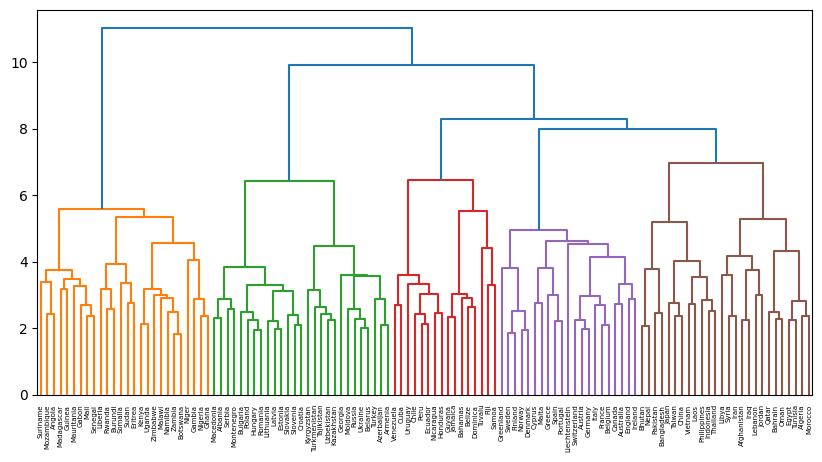

In [55]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

countries = list(set(countries))
plt.figure(figsize=(15, 5))
Z = linkage(model[countries], method="ward")
dendrogram(Z, labels=countries)
plt.show()

# ward法, デンドログラム  https://statisticsschool.com/%e3%80%90python%e3%80%91%e9%9a%8e%e5%b1%a4%e5%9e%8b%e3%82%af%e3%83%a9%e3%82%b9%e3%82%bf%e3%83%aa%e3%83%b3%e3%82%b0%e3%81%a8%e3%83%87%e3%83%b3%e3%83%89%e3%83%ad%e3%82%b0%e3%83%a9%e3%83%a0%e3%81%ae/

## 59. t-SNEによる可視化

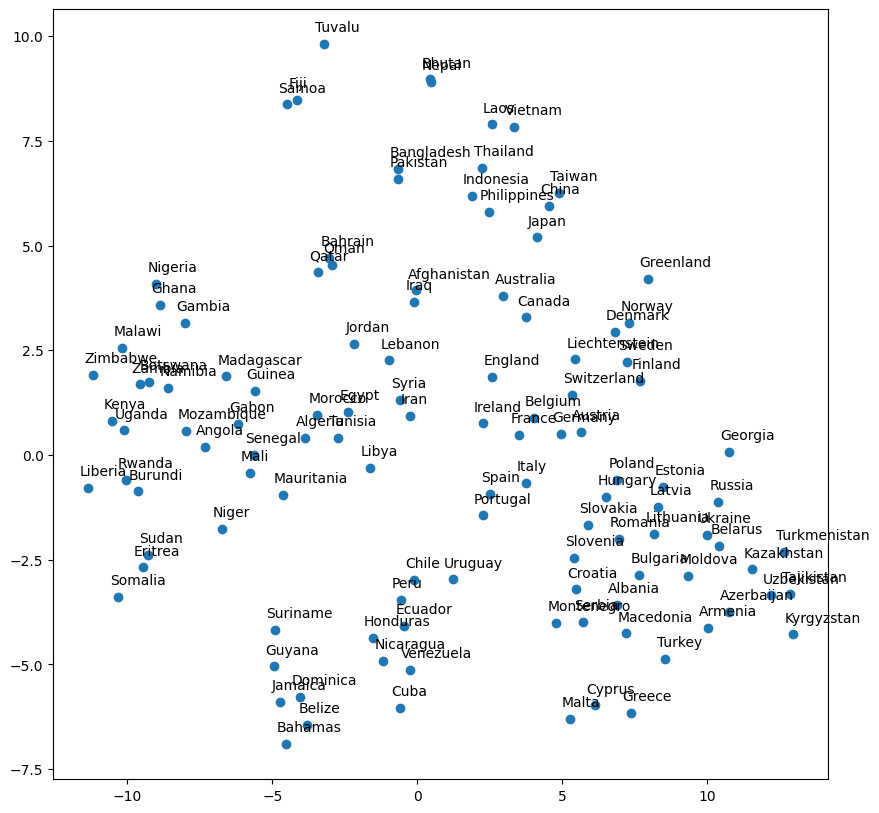

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(model[countries])
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for i, country in enumerate(countries):
    plt.text(X_tsne[i, 0] - 0.3, X_tsne[i, 1] + 0.3, country)
plt.show()

# t-SNEによる可視化   https://pokoroblog.com/python-ml-tsne/
# plt.text()の使い方  https://www.yutaka-note.com/entry/2020/01/08/080413